from sklearn.ensemble import RandomForestClassifier
# ^^^ pyforest auto-imports - don't write above this line
# Random Forest - Regression

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


## Exploratory Data Analysis and Visualization

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


In [11]:
df_numeric = df[["Year", "Selling_Price", "Present_Price", "Kms_Driven", "Owner"]]

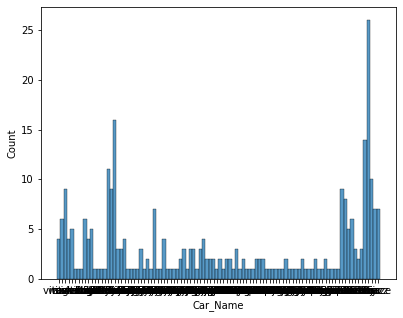

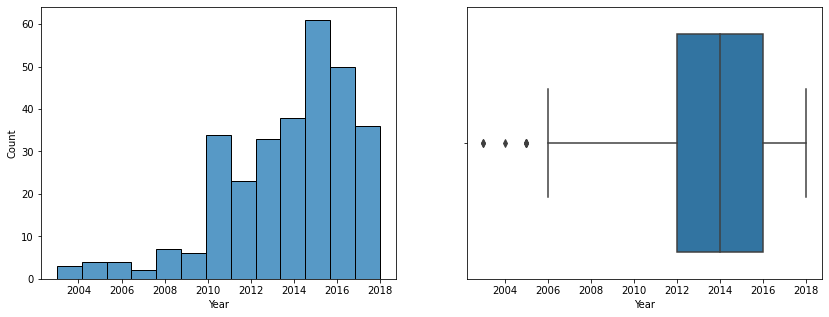

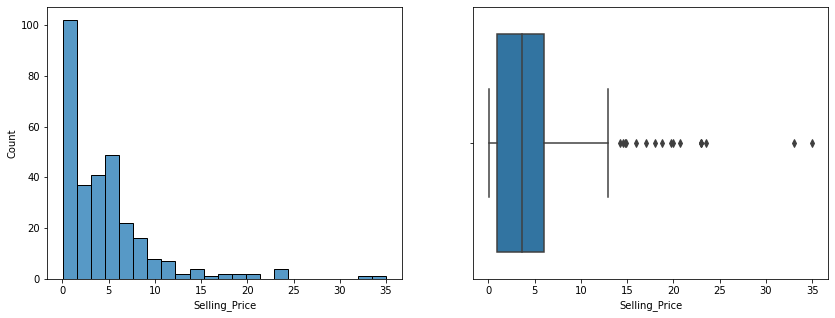

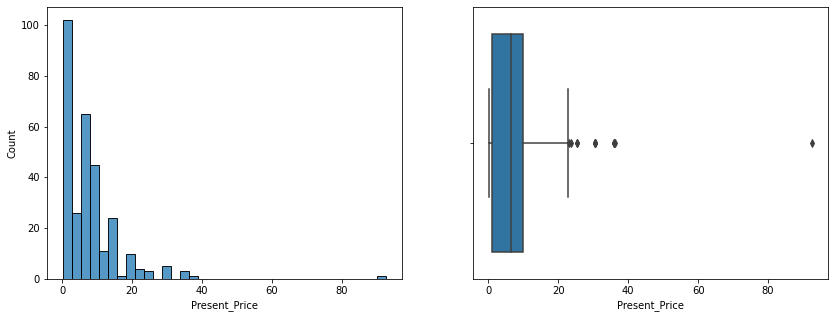

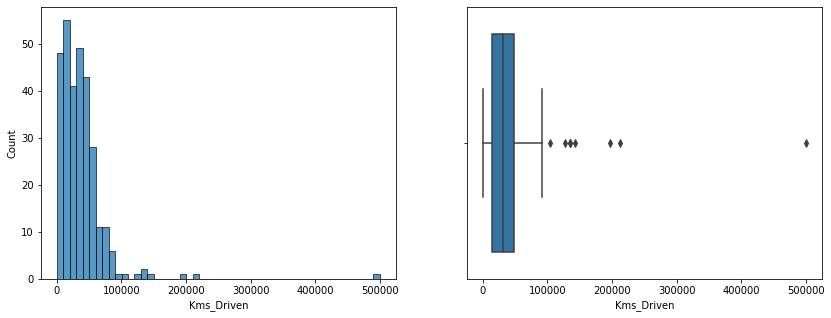

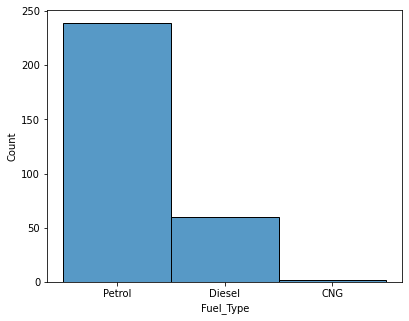

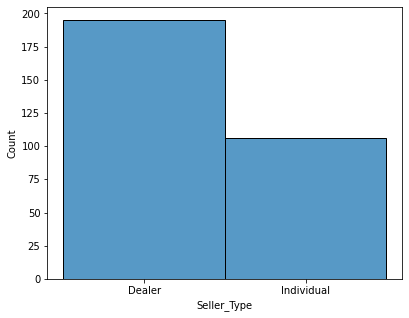

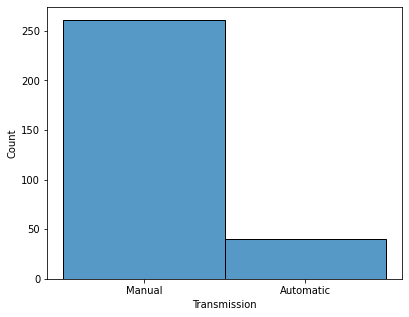

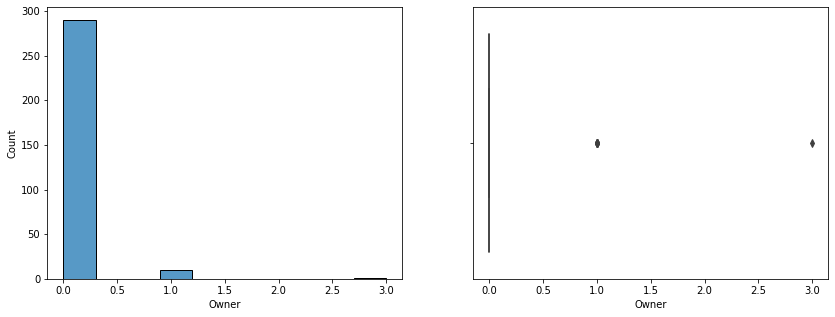

In [12]:
for col in df.columns:
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[col])
    if col in df_numeric.columns:
        plt.subplot(1, 2, 2)
        sns.boxplot(df[col])
    plt.show()

In [13]:
df.Car_Name.value_counts()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Honda CBZ extreme     1
land cruiser               1
TVS Jupyter                1
KTM 390 Duke               1
Honda CB Trigger           1
Name: Car_Name, Length: 98, dtype: int64

In [14]:
df["vehicle_age"]=2021-df.Year

In [15]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

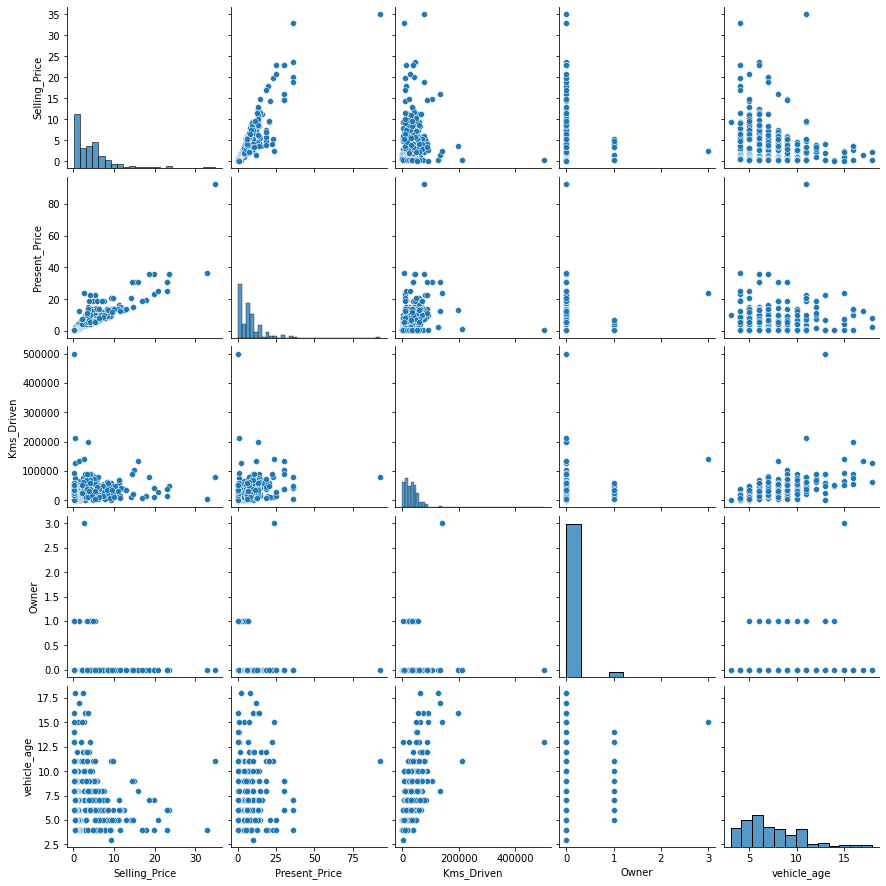

In [16]:
sns.pairplot(df);

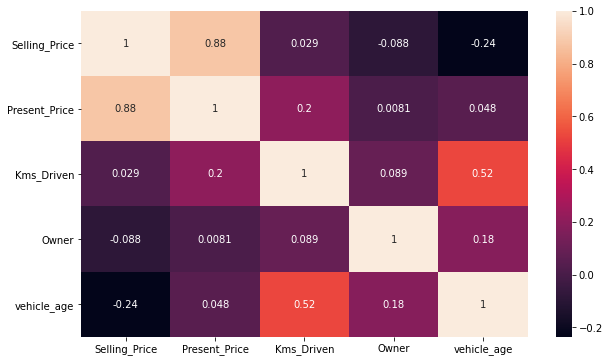

In [17]:
sns.heatmap(df.corr(), annot=True);

In [18]:
corr_by_price = df.corr()["Selling_Price"].sort_values()[:-1]
corr_by_price

vehicle_age     -0.236
Owner           -0.088
Kms_Driven       0.029
Present_Price    0.879
Name: Selling_Price, dtype: float64

In [19]:
df=pd.get_dummies(df, drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.350,5.590,27000,0,7,0,1,0,1
1,4.750,9.540,43000,0,8,1,0,0,1
2,7.250,9.850,6900,0,4,0,1,0,1
3,2.850,4.150,5200,0,10,0,1,0,1
4,4.600,6.870,42450,0,7,1,0,0,1


## Train | Test Split and Scalling

In [21]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [29]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [30]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [32]:
dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.000,0.933
mae,0.000,0.506
mse,0.000,0.644
rmse,0.000,0.802


In [33]:
model = DecisionTreeRegressor(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                             0.720
test_neg_mean_absolute_error       -1.028
test_neg_mean_squared_error        -8.043
test_neg_root_mean_squared_error   -2.587
dtype: float64
----------------------------------------------------------------


,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.003,0.003,0.807,-0.726,-1.741,-1.319
1,0.003,0.003,0.919,-1.109,-4.208,-2.051
2,0.003,0.002,0.824,-0.820,-3.230,-1.797
3,0.002,0.002,0.443,-1.169,-20.693,-4.549
4,0.003,0.002,0.607,-1.316,-10.343,-3.216


In [34]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [36]:
model = DecisionTreeRegressor(random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [37]:
dt_grid_model.best_params_

{'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [38]:
y_pred = dt_grid_model.predict(X_test)
y_train_pred = dt_grid_model.predict(X_train)
dt_tuned_r2 = r2_score(y_test, y_pred)
dt_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.924,0.812
mae,0.824,0.812
mse,2.270,1.806
rmse,1.507,1.344


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.989,0.792
mae,0.235,0.644
mse,0.337,1.996
rmse,0.581,1.413


In [41]:
model = RandomForestRegressor(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                             0.855
test_neg_mean_absolute_error       -0.799
test_neg_mean_squared_error        -4.028
test_neg_root_mean_squared_error   -1.903
dtype: float64
----------------------------------------------------------------


,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.122,0.008,0.936,-0.477,-0.580,-0.762
1,0.122,0.009,0.922,-1.046,-4.041,-2.010
2,0.128,0.009,0.746,-0.855,-4.679,-2.163
3,0.147,0.009,0.802,-0.747,-7.351,-2.711
4,0.141,0.010,0.867,-0.872,-3.489,-1.868


In [49]:
param_grid = {"n_estimators":[100, 301, 500],
             "max_depth":[None, 3, 5, 7],
             "max_features":["auto", 3, 5],
             "min_samples_split":[2, 4, 6]}

In [50]:
model = RandomForestRegressor(random_state=101)
rf_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [51]:
rf_grid_model.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [52]:
y_pred = rf_grid_model.predict(X_test)
y_train_pred = rf_grid_model.predict(X_train)
rf_tuned_r2 = r2_score(y_test, y_pred)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.983,0.872
mae,0.283,0.628
mse,0.515,1.228
rmse,0.718,1.108


### Comparing Feature Importance Between DT and RF

In [53]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
Present_Price,0.898
vehicle_age,0.073
Kms_Driven,0.016
Seller_Type_Individual,0.004
Transmission_Manual,0.004
Fuel_Type_Petrol,0.002
Fuel_Type_Diesel,0.002
Owner,0.000


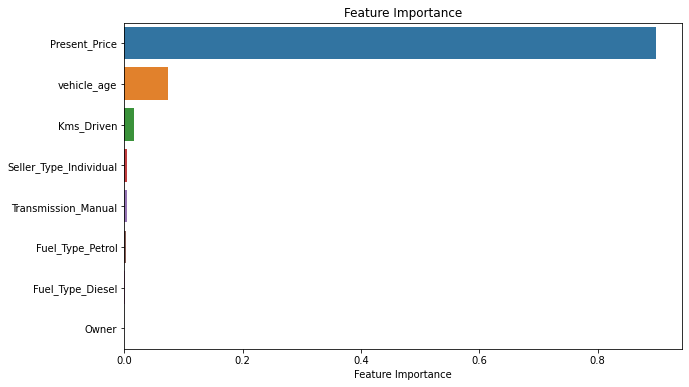

In [54]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [55]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
Present_Price,0.890
vehicle_age,0.090
Kms_Driven,0.015
Fuel_Type_Diesel,0.003
Transmission_Manual,0.001
Seller_Type_Individual,0.000
Fuel_Type_Petrol,0.000
Owner,0.000


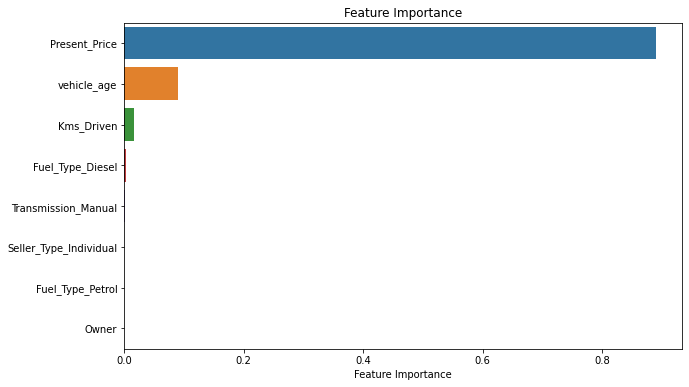

In [56]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

## Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
ln_model = LinearRegression()
ln_model.fit(X_train_scaled, y_train)
y_pred = ln_model.predict(X_test_scaled)
y_train_pred = ln_model.predict(X_train_scaled)
ln_r2 = r2_score(y_test, y_pred)
ln_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.897,0.607
mae,1.198,1.334
mse,3.059,3.779
rmse,1.749,1.944


In [59]:
model = LinearRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                                 'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                             0.779
test_neg_mean_absolute_error       -1.395
test_neg_mean_squared_error        -6.184
test_neg_root_mean_squared_error   -2.282
dtype: float64
----------------------------------------------------------------


,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.001,0.001,0.706,-1.199,-2.653,-1.629
1,0.000,0.001,0.852,-1.715,-7.665,-2.769
2,0.001,0.001,0.820,-1.233,-3.316,-1.821
3,0.001,0.001,0.575,-1.826,-15.803,-3.975
4,0.000,0.001,0.944,-1.000,-1.484,-1.218


## SVM

In [60]:
from sklearn.svm import SVR, LinearSVR

In [61]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
y_train_pred = svr_model.predict(X_train_scaled)
svr_r2 = r2_score(y_test, y_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.669,0.713
mae,1.512,1.087
mse,9.830,2.762
rmse,3.135,1.662


In [62]:
model = SVR()

scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                                 'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                              0.563
test_neg_mean_absolute_error        -1.815
test_neg_mean_squared_error        -13.634
test_neg_root_mean_squared_error    -3.454
dtype: float64
----------------------------------------------------------------


,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.002,0.002,0.622,-1.103,-3.408,-1.846
1,0.002,0.003,0.429,-2.906,-29.562,-5.437
2,0.003,0.001,0.609,-1.596,-7.191,-2.682
3,0.002,0.001,0.463,-1.731,-19.956,-4.467
4,0.002,0.002,0.694,-1.739,-8.055,-2.838


In [63]:
param_grid = {'C':[1,10,100],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0.01,0.1,1]}

In [64]:
model = SVR()
svr_grid_model = GridSearchCV(estimator=model,
                              param_grid=param_grid,
                              scoring='neg_root_mean_squared_error',
                              n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [65]:
svr_grid_model.best_params_

{'C': 100, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [66]:
y_pred = svr_grid_model.predict(X_test_scaled)
y_train_pred = svr_grid_model.predict(X_train_scaled)
svr_tuned_r2 = r2_score(y_test, y_pred)
svr_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.974,0.903
mae,0.505,0.583
mse,0.779,0.934
rmse,0.883,0.966


## Model Comparing

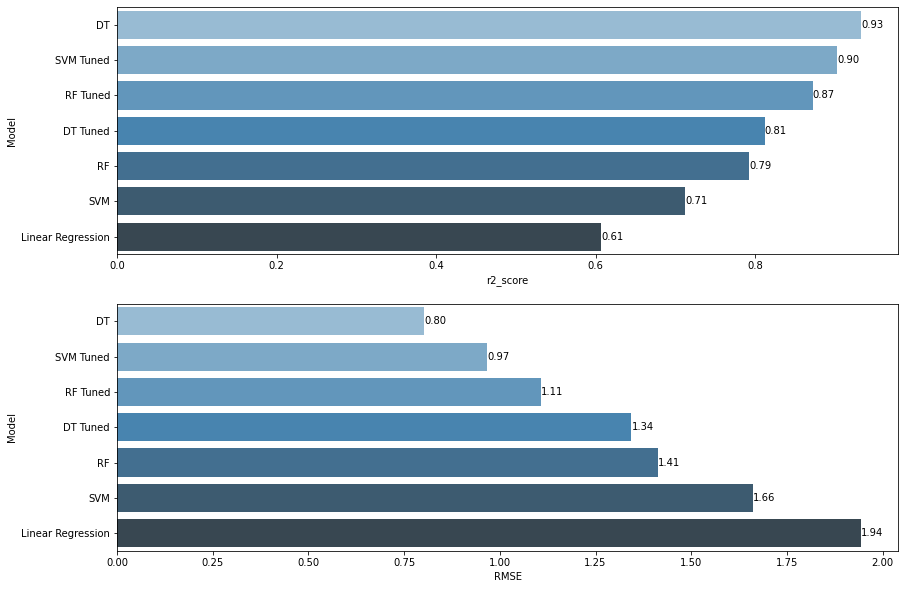

In [68]:
compare = pd.DataFrame({"Model": ["Linear Regression", "SVM", "SVM Tuned", "DT", "DT Tuned", "RF", "RF Tuned"],
                        "r2_score": [ln_r2, svr_r2, svr_tuned_r2, dt_r2, dt_tuned_r2, rf_r2, rf_tuned_r2],
                        "RMSE": [ln_rmse, svr_rmse, svr_tuned_rmse, dt_rmse, dt_tuned_rmse, rf_rmse, rf_tuned_rmse]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()